In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from enum import Enum
from itertools import cycle

class ActionPS(Enum):
    LEAVE = 0
    STAY = 1

class ActionPD(Enum):
    DEFECT = 0
    COOPERATE = 1

class State(Enum):
    PARTNER_DEFECTED = 0
    PARTNER_COOPERATED = 1

class StrategyPS(Enum):
    ALWAYS_STAY = 0
    OUT_FOR_TAT = 1
    REVERSE_OUT_FOR_TAT = 2
    ALWAYS_LEAVE = 3
    RANDOM = 4

class StrategyPD(Enum):
    ALWAYS_COOPERATE = 0
    TFT = 1
    RTFT = 2
    ALWAYS_DEFECT = 3
    RANDOM = 4
    
class Plots(Enum):
    OUTCOMES_PS = 1
    OUTCOMES_PD = 2
    STRATEGIES_PS = 3
    STRATEGIES_PD = 4
    PROBABILITY_MEANS_PS = 5
    PROBABILITY_MEANS_PD = 6
    REWARDS = 7
    SWITCHED = 8
    CHOSE_SWITCH = 9
    ACTIONS_PS = 10
    ACTIONS_PD = 11
    STATES_PS = 12
    STATES_PD = 13
    Q_VALUES_AVGS_PS = 14
    Q_VALUES_AVGS_PD = 15
    Q_VALUES_DIFFS_PS = 16
    Q_VALUES_DIFFS_PD = 17
    TEMPERATURES = 18
    STAY_STREAK_AVGS = 19
    LEAVE_STREAK_AVGS = 20
    COOPERATE_STREAK_AVGS = 21
    DEFECT_STREAK_AVGS = 22

def plot(types, results):

    # Plot each on a separate axis
    axises = []
    for plot_type in types:
        if len(axises) == 0:
            fig, axis = plt.subplots()
            axises.append(axis)
            axis.set_xlabel('Episode')
            # color_it = plt.cm.rainbow(np.linspace(0, 1, len(types)))
            color_it = cycle(plt.cm.tab10.colors)
        else:
            axises.append(axises[0].twinx())
            axis = axises[-1]
        if plot_type == Plots.OUTCOMES_PS:
            recorded_outcomes_ps = results["recorded_outcomes_ps"]
            # Plot Partner Selection Outcomes
            axis.plot(recorded_outcomes_ps[(ActionPS.LEAVE, ActionPS.LEAVE)], linewidth=1, label="(L, L)", color=next(color_it))
            axis.plot(recorded_outcomes_ps[(ActionPS.LEAVE, ActionPS.STAY)], linewidth=1, label="(L, S)", color=next(color_it))
            axis.plot(recorded_outcomes_ps[(ActionPS.STAY, ActionPS.LEAVE)], linewidth=1, label="(S, L)", color=next(color_it))
            axis.plot(recorded_outcomes_ps[(ActionPS.STAY, ActionPS.STAY)], linewidth=1, label="(S, S)", color=next(color_it))
            # axis.set_title("Percentage of Partner Selection Outcomes Per Episode")
            axis.set_ylabel('Percentage of Outcomes')
        elif plot_type == Plots.OUTCOMES_PD:
            recorded_outcomes_pd = results["recorded_outcomes_pd"]
            # Plot Prisoner's Dilemma Outcomes
            axis.plot(recorded_outcomes_pd[(ActionPD.DEFECT, ActionPD.DEFECT)], linewidth=1, label="(D, D)", color=next(color_it))
            axis.plot(recorded_outcomes_pd[(ActionPD.DEFECT, ActionPD.COOPERATE)], linewidth=1, label="(D, C)", color=next(color_it))
            axis.plot(recorded_outcomes_pd[(ActionPD.COOPERATE, ActionPD.DEFECT)], linewidth=1, label="(C, D)", color=next(color_it))
            axis.plot(recorded_outcomes_pd[(ActionPD.COOPERATE, ActionPD.COOPERATE)], linewidth=1, label="(C, C)", color=next(color_it))
            # axis.set_title("Percentage of Prisoner's Dilemma Outcomes Per Episode")
            axis.set_ylabel('Percentage of Outcomes')
        elif plot_type == Plots.STRATEGIES_PS:
            strat_always_leave = results["ps_strategies"][StrategyPS.ALWAYS_LEAVE]
            strat_out_for_tat = results["ps_strategies"][StrategyPS.OUT_FOR_TAT]
            strat_reverse_out_for_tat = results["ps_strategies"][StrategyPS.REVERSE_OUT_FOR_TAT]
            strat_always_stay = results["ps_strategies"][StrategyPS.ALWAYS_STAY]
            axis.plot(strat_always_leave, linewidth=1, label="PS: Always Leave", color=next(color_it))
            axis.plot(strat_out_for_tat, linewidth=1, label="PS: Out For Tat", color=next(color_it))
            axis.plot(strat_reverse_out_for_tat, linewidth=1, label="PS: Reverse Out For Tat", color=next(color_it))
            axis.plot(strat_always_stay, linewidth=1, label="PS: Always Stay", color=next(color_it))
            # axis.set_title("Number of Partner Selection Strategies Per Episode")
            axis.set_ylabel('Number of Agents')
        elif plot_type == Plots.STRATEGIES_PD:
            strat_always_defect = results["pd_strategies"][StrategyPD.ALWAYS_DEFECT]
            strat_tft = results["pd_strategies"][StrategyPD.TFT]
            strat_reverse_tft = results["pd_strategies"][StrategyPD.RTFT]
            strat_always_cooperate = results["pd_strategies"][StrategyPD.ALWAYS_COOPERATE]
            axis.plot(strat_always_defect, linewidth=1, label="PD: Always Defect", color=next(color_it))
            axis.plot(strat_tft, linewidth=1, label="PD: TFT", color=next(color_it))
            axis.plot(strat_reverse_tft, linewidth=1, label="PD: Reverse TFT", color=next(color_it))
            axis.plot(strat_always_cooperate, linewidth=1, label="PD: Always Cooperate", color=next(color_it))
            # axis.set_title("Number of Prisoner's Dilemma Strategies Per Episode")
            axis.set_ylabel('Number of Agents')
        elif plot_type == Plots.PROBABILITY_MEANS_PS:
            new_probabilities_ps_leave = results["new_probabilities_ps_leave"]
            new_probabilities_ps_stay = results["new_probabilities_ps_stay"]
            axis.plot(new_probabilities_ps_leave, label="PS: P(Leave | Defected)", color=next(color_it))
            axis.plot(new_probabilities_ps_stay, label="PS: P(Stay | Defected)", color=next(color_it))
            # axis.set_title("Probabilities of Leaving and Staying Given State Per Episode (Partner Selection)")
            axis.set_ylabel('Probability')
        elif plot_type == Plots.PROBABILITY_MEANS_PD:
            new_probabilities_pd_defected = results["new_probabilities_pd_defected"]
            new_probabilities_pd_cooperated = results["new_probabilities_pd_cooperated"]
            axis.plot(new_probabilities_pd_defected, label="PD: P(Defect | Defected)", color=next(color_it))
            axis.plot(new_probabilities_pd_cooperated, label="PD: P(Defect | Cooperated)", color=next(color_it))
            # axis.set_title("Probabilities of Defection Given State Per Episode (Prisoner's Dilemma)")
            axis.set_ylabel('Probability')
        elif plot_type == Plots.REWARDS:
            total_reward = results["total_reward"]
            axis.plot(total_reward, linewidth=3, color="black")
            # axis.set_title("Total Reward Per Episode")
            axis.set_ylabel('Total Reward')
        elif plot_type == Plots.SWITCHED:
            agent_switches_per_episode = results["agent_switches_per_episode"]
            axis.plot(np.divide(agent_switches_per_episode, 100), label="Agents Who Switched Partners", color=next(color_it))
            # axis.set_title("Percentage of Agents Who Switched Partners Per Episode")
            axis.set_ylabel('Percentage of Agents')
        elif plot_type == Plots.CHOSE_SWITCH:
            agent_chosen_switches_per_episode = results["agent_chosen_switches_per_episode"]
            axis.plot(np.divide(agent_chosen_switches_per_episode, 100), label="Agents Who Chose to Switch Partners", color=next(color_it))
            # axis.set_title("Percentage of Agents Who Chose to Switch Partners Per Episode")
            axis.set_ylabel('Percentage of Agents')
        elif plot_type == Plots.ACTIONS_PS:
            agent_pd_actions_per_episode = results["agent_pd_actions_per_episode"]
            axis.plot(agent_pd_actions_per_episode[0], label="Defected Given Partner Previously Defected", color=next(color_it))
            axis.plot(agent_pd_actions_per_episode[1], label="Cooperated Given Partner Previously Defected", color=next(color_it))
            axis.plot(agent_pd_actions_per_episode[2], label="Defected Given Partner Previously Cooperated", color=next(color_it))
            axis.plot(agent_pd_actions_per_episode[3], label="Cooperated Given Partner Previously Cooperated", color=next(color_it))
            # axis.set_title("Percentage of PD Actions Per Episode Given State")
            axis.set_ylabel('Percentage of Agents')
        elif plot_type == Plots.STATES_PS:
            percentage_of_states_per_episode = results["percentage_of_states_per_episode"]
            axis.plot(percentage_of_states_per_episode[0], label="Partner Defected", color=next(color_it))
            axis.plot(percentage_of_states_per_episode[1], label="Partner Cooperated", color=next(color_it))
            # axis.set_title("Percentage of Partner Selection Agent States Per Episode")
            axis.set_ylabel('Percentage of States')
        elif plot_type == Plots.STATES_PD:
            percentage_of_states_per_episode = results["percentage_of_states_per_episode"]
            axis.plot(percentage_of_states_per_episode[2], linestyle='dotted', label="Partner Defected", color=next(color_it))
            axis.plot(percentage_of_states_per_episode[3], linestyle='dotted', label="Partner Cooperated", color=next(color_it))
            # axis.set_title("Percentage of Prisoner's Dilemma Agent States Per Episode")
            axis.set_ylabel('Percentage of States')
        elif plot_type == Plots.Q_VALUES_AVGS_PS:
            agent_qvales_ps = results["agent_qvales_ps"]
            axis.plot(agent_qvales_ps[0], label="PS: Q(Leave | Defected)", color=next(color_it))
            axis.plot(agent_qvales_ps[1], label="PS: Q(Stay | Defected)", color=next(color_it))
            axis.plot(agent_qvales_ps[2], linestyle='dotted', label="PS: Q(Leave | Cooperated)", color=next(color_it))
            axis.plot(agent_qvales_ps[3], linestyle='dotted', label="PS: Q(Stay | Cooperated)", color=next(color_it))
            # axis.set_title("Average Partner Selection Q-Values in each episode")
            axis.set_ylabel('Q-Value')
        elif plot_type == Plots.Q_VALUES_AVGS_PD:
            agent_qvales_pd = results["agent_qvales_pd"]
            axis.plot(agent_qvales_pd[0], label="PD: Q(Defect | Defected)", color=next(color_it))
            axis.plot(agent_qvales_pd[1], label="PD: Q(Cooperate | Defected)", color=next(color_it))
            axis.plot(agent_qvales_pd[2], linestyle='dotted', label="PD: Q(Defect | Cooperated)", color=next(color_it))
            axis.plot(agent_qvales_pd[3], linestyle='dotted', label="PD: Q(Cooperate | Cooperated)", color=next(color_it))
            # axis.set_title("Average Prisoner's Dilemma Q-Values in each episode")
            axis.set_ylabel('Q-Value')
        elif plot_type == Plots.Q_VALUES_DIFFS_PS:
            agent_qvales_ps = results["agent_qvales_ps"]
            axis.plot(agent_qvales_ps[0] - agent_qvales_ps[1], label="PS: Q(Leave | Defected) - Q(Stay | Defected)", color=next(color_it))
            axis.plot(agent_qvales_ps[2] - agent_qvales_ps[3], label="PS: Q(Leave | Cooperated) - Q(Stay | Cooperated)", color=next(color_it))
            # axis.set_title("Average Partner Selection Q-Value Differences in each episode")
            axis.set_ylabel('Q-Value Difference')
        elif plot_type == Plots.Q_VALUES_DIFFS_PD:
            agent_qvales_pd = results["agent_qvales_pd"]
            axis.plot(agent_qvales_pd[0] - agent_qvales_pd[1], label="PD: Q(Defect | Defected) - Q(Cooperate | Defected)", color=next(color_it))
            axis.plot(agent_qvales_pd[2] - agent_qvales_pd[3], label="PD: Q(Defect | Cooperated) - Q(Cooperate | Cooperated)", color=next(color_it))
            # axis.set_title("Average Prisoner's Dilemma Q-Value Differences in each episode")
            axis.set_ylabel('Q-Value Difference')
        elif plot_type == Plots.STAY_STREAK_AVGS:
            stay_streaks = results["avg_stay_streak"]
            axis.plot(stay_streaks, label="Average Stay Streak", color=next(color_it))
            # axis.set_title("Average Stay Streak in each episode")
            axis.set_ylabel('Stay Streak')
        elif plot_type == Plots.LEAVE_STREAK_AVGS:
            leave_streaks = results["avg_leave_streak"]
            axis.plot(leave_streaks, label="Average Leave Streak", color=next(color_it))
            # axis.set_title("Average Leave Streak in each episode")
            axis.set_ylabel('Leave Streak')
        elif plot_type == Plots.COOPERATE_STREAK_AVGS:
            cooperate_streaks = results["avg_cooperate_streak"]
            axis.plot(cooperate_streaks, label="Average Cooperate Streak", color=next(color_it))
            # axis.set_title("Average Cooperate Streak in each episode")
            axis.set_ylabel('Cooperate Streak')
        elif plot_type == Plots.DEFECT_STREAK_AVGS:
            defect_streaks = results["avg_defect_streak"]
            axis.plot(defect_streaks, label="Average Defect Streak", color=next(color_it))
            # axis.set_title("Average Defect Streak in each episode")
            axis.set_ylabel('Defect Streak')
        elif plot_type == Plots.TEMPERATURES:
            temps = results["temps"]
            # bound temps between 0 and 1
            temps = [max(0, min(1, temp)) for temp in temps]
            axis.plot(temps, label="Temperature", color='black')
            # axis.set_title("Temperature in each episode")
            axis.set_ylabel('Temperature')
        if len(axises) % 2 == 1:
            axis.legend(loc="center", bbox_to_anchor=(0.2, -0.2 * (len(axises))))
        if len(axises) % 2 == 0:
            axis.legend(loc="center", bbox_to_anchor=(0.8, -0.2 * (len(axises) - 1)))
        if len(axises) > 2:
            axis.spines['right'].set_position(('outward', (len(axises) - 2) * 60))
    plt.show()

def plot_all(results):
    plot_pd_outcomes(results)
    plot_strategies(results)
    plot_mean_probabilities(results)
    plot_rewards(results)
    plot_agent_switches_per_episode(results)
    plot_percentage_of_pd_actions_per_episode(results)
    plot_percentage_of_states_per_episode(results)
    plot_final_strategies(results)
    plot_strategy_combinations(results)
    plot_agent_strategy_pairings(results)
    plot_average_qvalues(results)
    plot_agents_qvalues(results)
    plot_outcome_changes(results)
    plot_temps(results)

def plot_pd_outcomes(results):
    recorded_outcomes_pd = results["recorded_outcomes_pd"]
    # Plot Prisoner's Dilemma Outcomes
    plt.plot(recorded_outcomes_pd[(ActionPD.DEFECT, ActionPD.DEFECT)], linewidth=1, label="(D, D)")
    plt.plot(recorded_outcomes_pd[(ActionPD.DEFECT, ActionPD.COOPERATE)], linewidth=1, label="(D, C)")
    plt.plot(recorded_outcomes_pd[(ActionPD.COOPERATE, ActionPD.DEFECT)], linewidth=1, label="(C, D)")
    plt.plot(recorded_outcomes_pd[(ActionPD.COOPERATE, ActionPD.COOPERATE)], linewidth=1, label="(C, C)")
    
    plt.title("Percentage of Prisoner's Dilemma Outcomes Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Percentage of Outcomes')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_strategies(results, do_ps=True, do_pd=True):
    strat_always_leave = results["ps_strategies"][StrategyPS.ALWAYS_LEAVE]
    strat_out_for_tat = results["ps_strategies"][StrategyPS.OUT_FOR_TAT]
    strat_reverse_out_for_tat = results["ps_strategies"][StrategyPS.REVERSE_OUT_FOR_TAT]
    strat_always_stay = results["ps_strategies"][StrategyPS.ALWAYS_STAY]
    strat_always_defect = results["pd_strategies"][StrategyPD.ALWAYS_DEFECT]
    strat_tft = results["pd_strategies"][StrategyPD.TFT]
    strat_rtft = results["pd_strategies"][StrategyPD.RTFT]
    strat_always_cooperate = results["pd_strategies"][StrategyPD.ALWAYS_COOPERATE]

    title = "Number of " + ("Partner Selection" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Prisoner's Dilemma" if do_pd else "") + " Strategies Per Episode"

    if do_ps:
        plt.plot(strat_always_leave, linewidth=1, label="PS: Always Leave")
        plt.plot(strat_out_for_tat, linewidth=1, label="PS: Out For Tat")
        plt.plot(strat_reverse_out_for_tat, linewidth=1, label="PS: Reverse Out For Tat")
        plt.plot(strat_always_stay, linewidth=1, label="PS: Always Stay")

    if do_pd:
        plt.plot(strat_always_defect, linewidth=1, label="PD: Always Defect")
        plt.plot(strat_tft, linewidth=1, label="PD: Tit For Tat")
        plt.plot(strat_rtft, linewidth=1, label="PD: Reverse Tit For Tat")
        plt.plot(strat_always_cooperate, linewidth=1, label="PD: Always Cooperate")

    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Number of Agents')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_mean_probabilities(results, do_ps=True, do_pd=True):
    new_probabilities_pd_defected = results["new_probabilities_pd_defected"]
    new_probabilities_pd_cooperated = results["new_probabilities_pd_cooperated"]
    new_probabilities_ps_defected = results["new_probabilities_ps_defected"]
    new_probabilities_ps_cooperated = results["new_probabilities_ps_cooperated"]
    new_max_probabilities_pd_defected = results["new_max_probabilities_pd_defected"]
    new_max_probabilities_pd_cooperated = results["new_max_probabilities_pd_cooperated"]
    new_max_probabilities_ps_defected = results["new_max_probabilities_ps_defected"]
    new_max_probabilities_ps_cooperated = results["new_max_probabilities_ps_cooperated"]

    title = "Probabilities of " + \
        ("Leaving" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Defection" if do_pd else "") + \
        " Given State Per Episode"
    ylabel = ("Probability of Leaving" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Probability of Defection" if do_pd else "")


    plt.title(title)
    if do_ps:
        plt.plot(new_probabilities_ps_defected, label="PS: P(Leaving | Defected)")
        plt.plot(new_probabilities_ps_cooperated, label="PS: P(Leaving | Cooperated)")
        plt.plot(new_max_probabilities_ps_defected, linestyle="dotted", label="PS: Max[P(? | Defected)]", alpha=0.5, color="#1f77b4")
        plt.plot(new_max_probabilities_ps_cooperated, linestyle="dotted", label="PS: Max[P(? | Cooperated)]", alpha=0.5, color="#ff7f0e")

    if do_pd:
        plt.plot(new_probabilities_pd_defected, label="PD: P(Defect | Defected)")
        plt.plot(new_probabilities_pd_cooperated, label="PD: P(Defect | Cooperated)")
        plt.plot(new_max_probabilities_pd_defected, linestyle="dotted", label="PD: Max[P(? | Defected)]", alpha=0.5, color="#2ca02c")
        plt.plot(new_max_probabilities_pd_cooperated, linestyle="dotted", label="PD: Max[P(? | Cooperated)]", alpha=0.5, color="#d62728")
    plt.xlabel("Episodes")
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.ylabel(ylabel)
    plt.show()

def plot_rewards(results):
    total_reward = results["total_reward"]
    population = results["population"]
    rounds = results["rounds"]
    # Plot Total Rewards
    plt.plot(total_reward, linewidth=3)

    plt.title("Total Reward Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.ylim(0, 6 * population * rounds / 2)
    plt.show()

def plot_agent_switches_per_episode(results):
    agent_chosen_switches_per_episode = results["agent_chosen_switches_per_episode"]
    agent_switches_per_episode = results["agent_switches_per_episode"]
    population = results["population"]
    rounds = results["rounds"]
    
    # Plot Agent/Pair Switches Per Episode
    plt.plot(np.divide(agent_chosen_switches_per_episode, rounds * population), label="Agents Who Chose to Switch Partners")
    plt.plot(np.divide(agent_switches_per_episode, rounds * population), label="Agents Who Switched Partners")

    plt.title("Percentage of Switches Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Percentage of Agents')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_percentage_of_pd_actions_per_episode(results):
    agent_pd_actions_per_episode = results["agent_pd_actions_per_episode"]
    # Plot Percentage of Agent PD Actions Per Episode Given State
    plt.plot(agent_pd_actions_per_episode[0], label="Defected Given Partner Previously Defected")
    plt.plot(agent_pd_actions_per_episode[1], label="Cooperated Given Partner Previously Defected")
    plt.plot(agent_pd_actions_per_episode[2], label="Defected Given Partner Previously Cooperated")
    plt.plot(agent_pd_actions_per_episode[3], label="Cooperated Given Partner Previously Cooperated")
    
    plt.title("Percentage of PD Actions Per Episode Given State")
    plt.xlabel('Episode')
    plt.ylabel('Percentage of Agents')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_percentage_of_states_per_episode(results, do_ps=True, do_pd=True):
    percentage_of_states_per_episode = results["percentage_of_states_per_episode"]
    
    title = "Percentage of " + ("Partner Selection" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Prisoner's Dilemma" if do_pd else "") + " Agent States Per Episode"

    if do_ps:
        # Plot Percentage of Agent States Per Episode
        plt.plot(percentage_of_states_per_episode[0], label="PS: Partner Defected")
        plt.plot(percentage_of_states_per_episode[1], label="PS: Partner Cooperated")
        
    if do_pd:
        plt.plot(percentage_of_states_per_episode[2], linestyle='dotted', label="PD: Partner Defected")
        plt.plot(percentage_of_states_per_episode[3], linestyle='dotted', label="PD: Partner Cooperated")
        
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Percentage of States')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_final_strategies(results, do_ps=True, do_pd=True):
    num_strategies_ps = results["num_strategies_ps"]
    num_strategies_pd = results["num_strategies_pd"]
    population = results["population"]

    if do_ps:
        plt.subplot(211)
        ps_colors = [strategy_colors[strategy] for strategy in StrategyPS]
        plt.bar([strategy_names[strategy] for strategy in StrategyPS], num_strategies_ps, color=ps_colors)
        plt.title('PS-Strategies')
        plt.xlabel('Strategy')
        plt.ylabel('Number of Agents')
        plt.ylim(0, population)
        plt.show()

    if do_pd:
        plt.subplot(212)
        pd_colors = [strategy_colors[strategy] for strategy in StrategyPD]
        plt.bar([strategy_names[strategy] for strategy in StrategyPD], num_strategies_pd, color=pd_colors)
        plt.title('PD-Strategies')
        plt.xlabel('Strategy')
        plt.ylabel('Number of Agents')
        plt.ylim(0, population)
        plt.show()

def plot_strategy_combinations(results):
    strategy_combinations = results["strategy_combinations"]
    population = results["population"]
    
    # Plot agent partner selection and prisoner's dilemma strategy combinations
    combination_indices = [i for i in range(len(strategy_combinations.ravel()))]
    ps_combination_colors = np.repeat([strategy_colors[strategy] for strategy in StrategyPS], 5)
    pd_combination_colors = np.tile([strategy_colors[strategy] for strategy in StrategyPD], 5)
    plt.bar(combination_indices, strategy_combinations.ravel() / 2.0, color=ps_combination_colors)
    plt.bar(combination_indices, strategy_combinations.ravel() / 2.0, bottom=(strategy_combinations.ravel() / 2.0), color=pd_combination_colors)
    plt.title('Final Strategy Combinations')
    plt.xlabel('Strategy Combination')
    plt.ylabel('Number of Agents')
    # plt.ylim(0, population)
    plt.legend(
        [plt.Rectangle((0, 0), 1, 1, color=value) for key, value in strategy_colors.items()],
        [strategy_names[key] for key, value in strategy_colors.items()],
        loc='upper center',
        bbox_to_anchor=(0.5, 1.35),
        ncol=5,
    )
    plt.show()

def plot_agent_strategy_pairings(results):
    recorded_agent_strategy_pairings = results["recorded_agent_strategy_pairings"]
    # Plot Prisoner's Dilemma Strategy Pairings
    for pairing, values in recorded_agent_strategy_pairings.items():
        plt.plot(values, '-', color=strategy_colors[pairing[0]], linewidth=3)
        plt.plot(values, '--', color=strategy_colors[pairing[1]], linewidth=3)
    
    plt.title("Prisoner's Dilemma Strategy Pairings Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Number of Pairings')
    plt.legend(
        [plt.Rectangle((0, 0), 1, 1, color=strategy_colors[strategy]) for strategy in StrategyPD],
        [strategy_names[strategy] for strategy in StrategyPD],
        loc='upper center',
        bbox_to_anchor=(0.5, 1.35),
        ncol=5,
    )
    plt.show()

def plot_average_qvalues(results, do_ps=True, do_pd=True):
    agent_qvales_ps = results["agent_qvales_ps"]
    agent_qvales_pd = results["agent_qvales_pd"]
    population = results["population"]

    title = "Average " + ("Partner Selection" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Prisoner's Dilemma" if do_pd else "") + " Q-Values in each episode"

    if do_ps:
        # Plot Average Partner Selection Q-Values in each episode
        plt.plot(agent_qvales_ps[0], label="PS: Q(Leave | Defected)")
        plt.plot(agent_qvales_ps[1], label="PS: Q(Stay | Defected)")
        plt.plot(agent_qvales_ps[2], linestyle='dotted', label="PS: Q(Leave | Cooperated)")
        plt.plot(agent_qvales_ps[3], linestyle='dotted', label="PS: Q(Stay | Cooperated)")
        
    if do_pd:
        # Plot Average Prisoner's Dilemma Q-Values in each episode
        plt.plot(agent_qvales_pd[0], label="PD: Q(Defect | Defected)")
        plt.plot(agent_qvales_pd[1], label="PD: Q(Cooperate | Defected)")
        plt.plot(agent_qvales_pd[2], linestyle='dotted', label="PD: Q(Defect | Cooperated)")
        plt.plot(agent_qvales_pd[3], linestyle='dotted', label="PD: Q(Cooperate | Cooperated)")
        
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Q-Value')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_average_q_differences(results, do_ps=True, do_pd=True):
    agent_qvales_ps = results["agent_qvales_ps"]
    agent_qvales_pd = results["agent_qvales_pd"]
    population = results["population"]

    title = "Average " + ("Partner Selection" if do_ps else "") + (" and " if do_ps and do_pd else "") + ("Prisoner's Dilemma" if do_pd else "") + " Q-Value Differences in each episode"

    if do_ps:
        # Plot Average Partner Selection Q-Values in each episode
        plt.plot(agent_qvales_ps[0] - agent_qvales_ps[1], label="PS: Q(Leave | Defected) - Q(Stay | Defected)")
        plt.plot(agent_qvales_ps[2] - agent_qvales_ps[3], label="PS: Q(Leave | Cooperated) - Q(Stay | Cooperated)")
        

    if do_pd:
        # Plot Average Prisoner's Dilemma Q-Values in each episode
        plt.plot(agent_qvales_pd[0] - agent_qvales_pd[1], label="PD: Q(Defect | Defected) - Q(Cooperate | Defected)")
        plt.plot(agent_qvales_pd[2] - agent_qvales_pd[3], label="PD: Q(Defect | Cooperated) - Q(Cooperate | Cooperated)")
        
        plt.title(title)
        plt.xlabel('Episode')
        plt.ylabel('Q-Value Difference')
        plt.ylim(-4,4) # Adjust the y-axis limits for better visibility
        plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
        plt.show()

def plot_agents_qvalues(results, do_ps=False, do_pd=True):
    recorded_qvalues_ps = results["recorded_qvalues_ps"]
    recorded_qvalues_pd = results["recorded_qvalues_pd"]
    population = results["population"]
    
    for idx in range(int(population)):
        title = "Agent " + str(idx) + " Q-Values in each episode" + (" (Partner Selection)" if do_ps else "") + (" (Prisoner's Dilemma)" if do_pd else "")
        # Plot Agents Partner Selection Q-Values in each episode
        if do_ps:
            plt.plot(recorded_qvalues_ps[idx][0], label="PS: Q(Leave | Defected)")
            plt.plot(recorded_qvalues_ps[idx][1], label="PS: Q(Stay | Defected)")
            plt.plot(recorded_qvalues_ps[idx][2], linestyle='dotted', label="PS: Q(Leave | Cooperated)")
            plt.plot(recorded_qvalues_ps[idx][3], linestyle='dotted', label="PS: Q(Stay | Cooperated)")

        # Plot Agents Prisoner's Dilemma Q-Values in each episode
        if do_pd:
            plt.plot(recorded_qvalues_pd[idx][0], label="PD: Q(Defect | Defected)")
            plt.plot(recorded_qvalues_pd[idx][1], label="PD: Q(Cooperate | Defected)")
            plt.plot(recorded_qvalues_pd[idx][2], linestyle='dotted', label="PD: Q(Defect | Cooperated)")
            plt.plot(recorded_qvalues_pd[idx][3], linestyle='dotted', label="PD: Q(Cooperate | Cooperated)")
            
        plt.title(title)
        plt.xlabel('Episode')
        plt.ylabel('Q-Value')
        plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5))
        plt.show()

def plot_outcome_changes(results):
    recorded_outcome_changes = results["recorded_outcome_changes"]
    rounds = results["rounds"]
    population = results["population"]
    # plot recorded outcome changes
    outcome_changes_legend = []
    for keys, changes in recorded_outcome_changes.items():
        if keys[0] == (ActionPD.COOPERATE, ActionPD.COOPERATE):
            style = 'solid'
        elif keys[0] == (ActionPD.COOPERATE, ActionPD.DEFECT):
            style = 'dotted'
        elif keys[0] == (ActionPD.DEFECT, ActionPD.COOPERATE):
            style = 'dashed'
        elif keys[0] == (ActionPD.DEFECT, ActionPD.DEFECT):
            style = 'dashdot'

        if keys[1] == (ActionPD.COOPERATE, ActionPD.COOPERATE):
            color = 'red'
        elif keys[1] == (ActionPD.COOPERATE, ActionPD.DEFECT):
            color = 'green'
        elif keys[1] == (ActionPD.DEFECT, ActionPD.COOPERATE):
            color = 'orange'
        elif keys[1] == (ActionPD.DEFECT, ActionPD.DEFECT):
            color = 'blue'
        
        changes = np.divide(changes, rounds * population)

        plt.plot(changes, linestyle=style, color=color)
        outcome_changes_legend.append("(%s, %s) -> (%s, %s)" % (keys[0][0].name, keys[0][1].name, keys[1][0].name, keys[1][1].name))
    
    # Plot the changes in outcomes for prisoner's dilemma games per episode
    plt.title("Prisoner's Dilemma Outcome Changes Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Changes')
    plt.legend(outcome_changes_legend, loc='center left', bbox_to_anchor=(1.04, 0.5))
    plt.show()

def plot_temps(results):
    temps = results["temps"]
    # Bound temps between 0 and 1
    temps = np.clip(temps, 0, 1)
    plt.plot(temps)
    plt.title("Temperature Changes Per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Temperature')
    plt.show()

def average_results(results):
    keys = results[0].keys()
    averaged_results = {}
    for key in keys:
        if isinstance(results[0][key], dict):
            averaged_results[key] = {}
            for subkey in results[0][key].keys():
                try:
                    averaged_results[key][subkey] = np.mean([result[key][subkey] for result in results], axis=0)
                except TypeError as e:
                    averaged_results[key][subkey] = [result[key][subkey] for result in results]
        else:
            try:
                averaged_results[key] = np.mean([result[key] for result in results], axis=0)
            except TypeError as e:
                averaged_results[key] = [result[key] for result in results]
    return averaged_results

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
plot/delta_t_compare.pkl
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

######################################################################################################################################################
######################################################################################################################################################
population: 20
rounds: 20
learning_rate: 0.05
learning_mode: q_learning
policy_mode: epsilon_greedy
starting_temperature: 1
discount_rate: 0.99
delta_t: 1.0
decay_type: linear
start_decay_episode: 3000
end_decay_episode: None
disposition: 0.0
know_fresh_agent: 1.0
prefer_same_pool: 0.0
prefer_different_pool: 0.0
########################################################

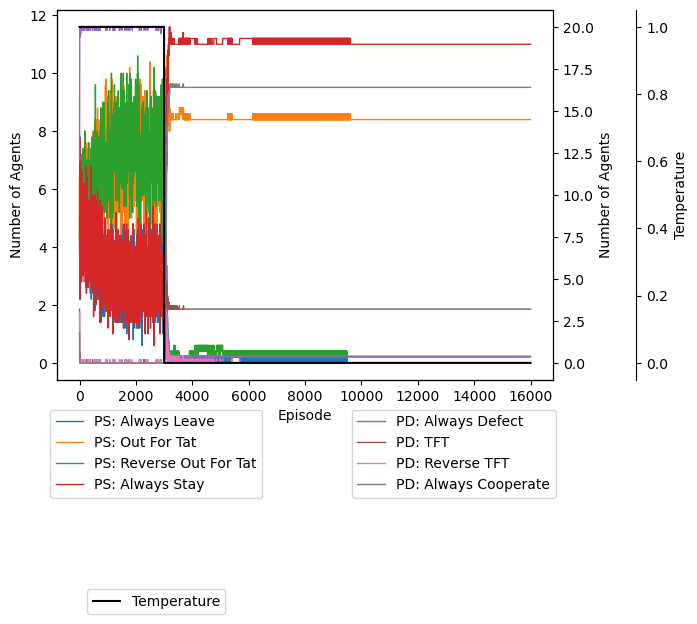

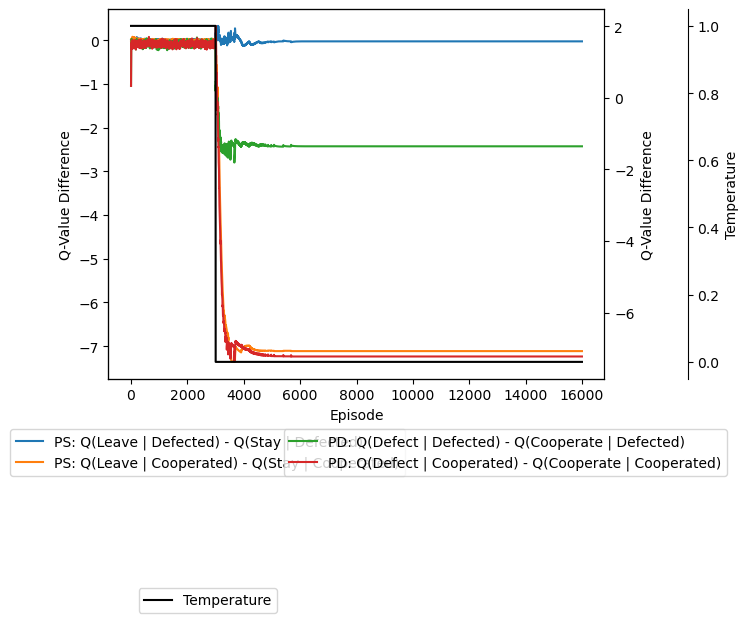

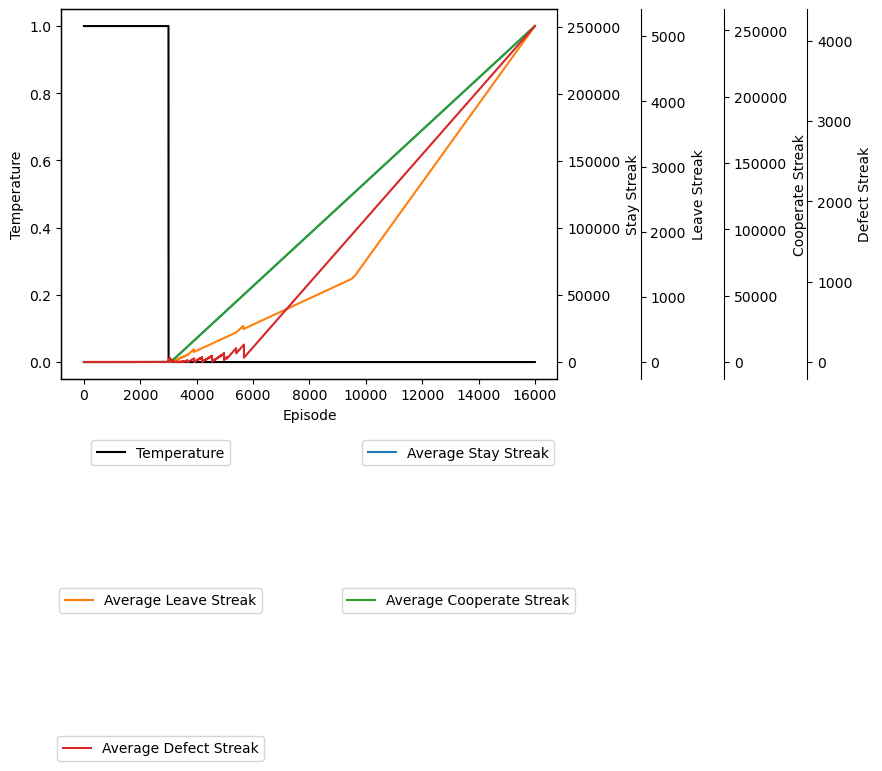

######################################################################################################################################################
######################################################################################################################################################
population: 20
rounds: 20
learning_rate: 0.05
learning_mode: q_learning
policy_mode: epsilon_greedy
starting_temperature: 1
discount_rate: 0.99
delta_t: 0.1
decay_type: linear
start_decay_episode: 3000
end_decay_episode: None
disposition: 0.0
know_fresh_agent: 1.0
prefer_same_pool: 0.0
prefer_different_pool: 0.0
######################################################################################################################################################
######################################################################################################################################################

Discount_Rate: 0.100000


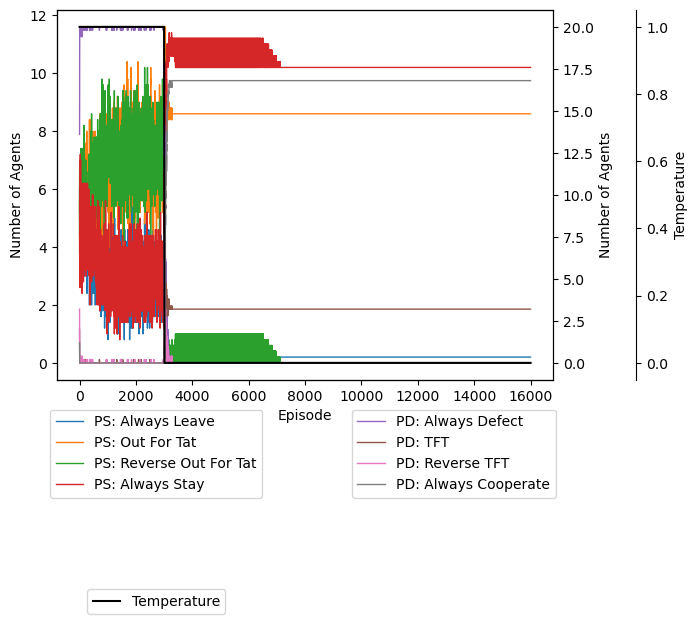

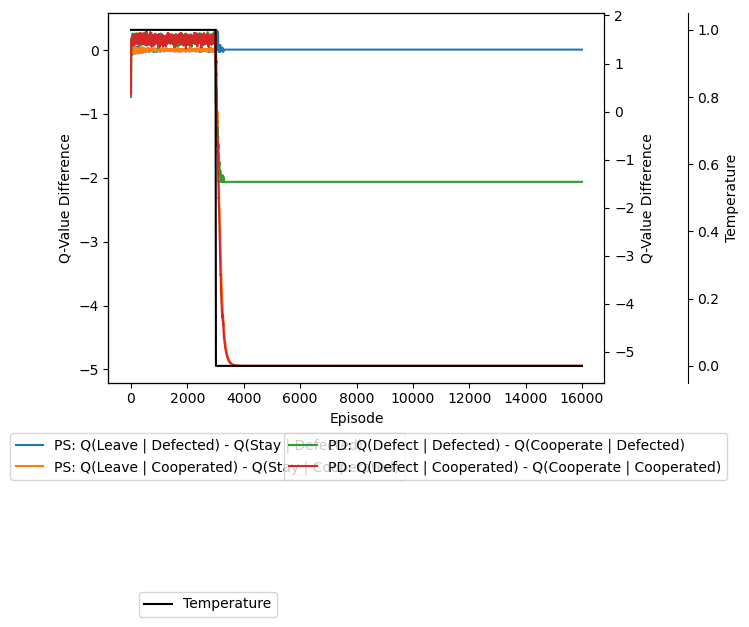

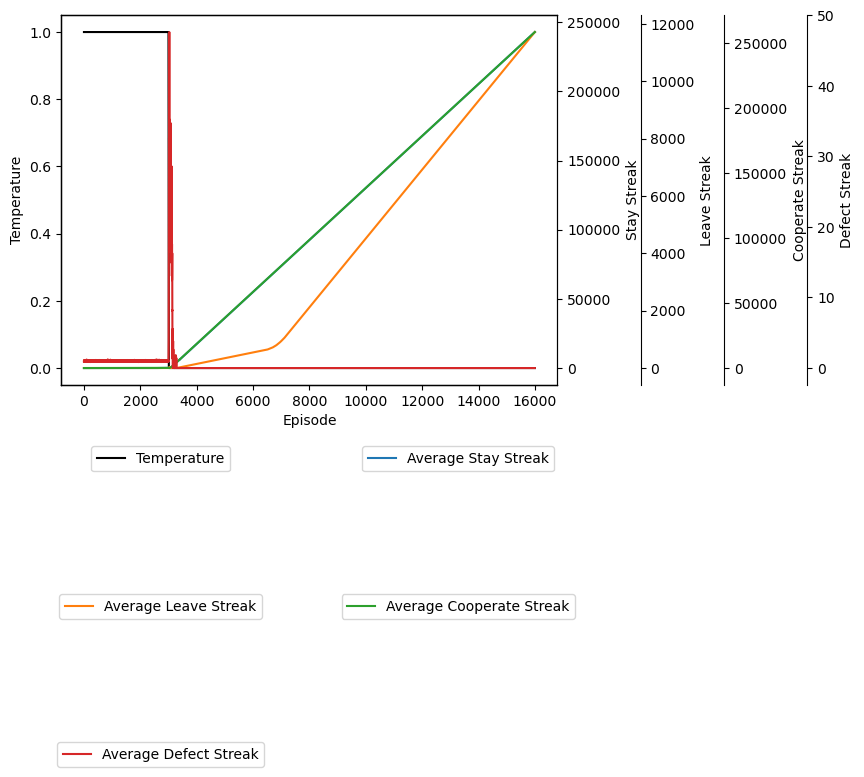

######################################################################################################################################################
######################################################################################################################################################
population: 20
rounds: 20
learning_rate: 0.05
learning_mode: q_learning
policy_mode: epsilon_greedy
starting_temperature: 1
discount_rate: 0.99
delta_t: 0.01
decay_type: linear
start_decay_episode: 3000
end_decay_episode: None
disposition: 0.0
know_fresh_agent: 1.0
prefer_same_pool: 0.0
prefer_different_pool: 0.0
######################################################################################################################################################
######################################################################################################################################################

Discount_Rate: 0.010000


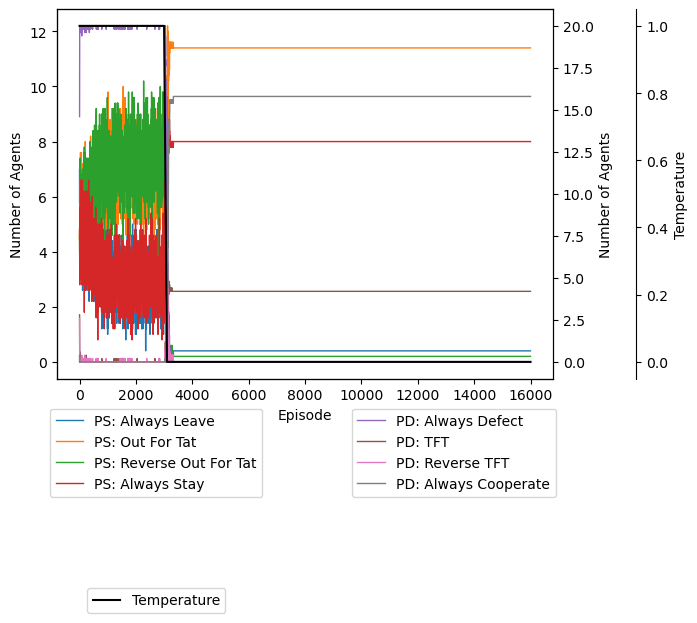

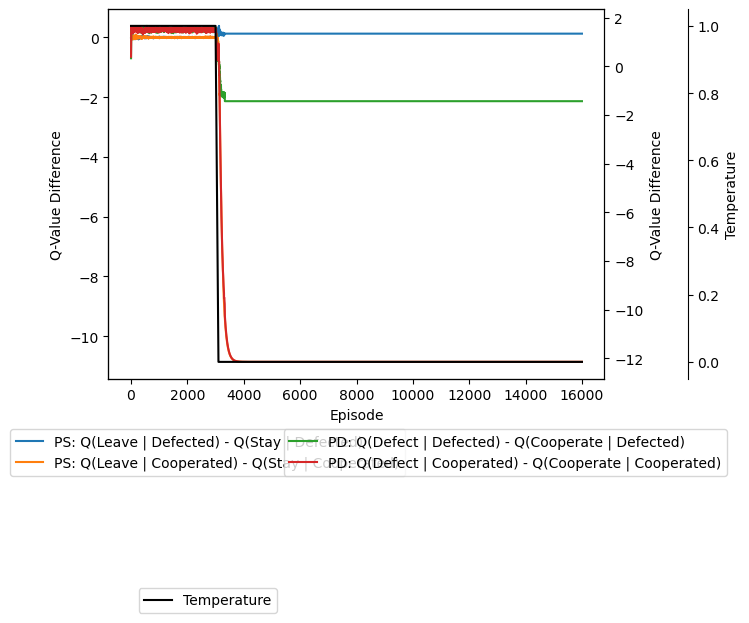

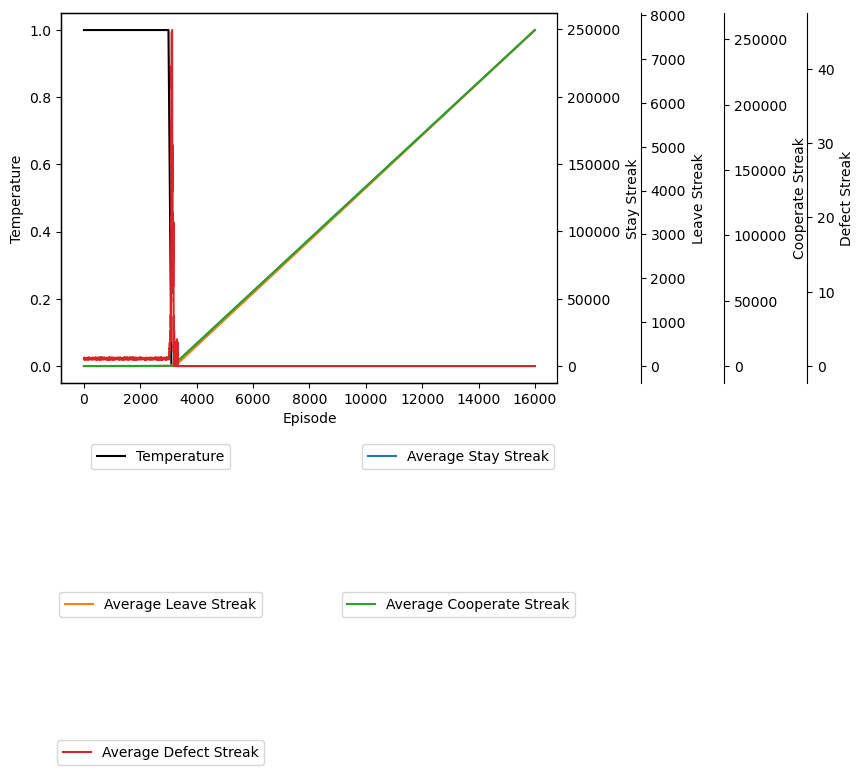

######################################################################################################################################################
######################################################################################################################################################
population: 20
rounds: 20
learning_rate: 0.05
learning_mode: q_learning
policy_mode: epsilon_greedy
starting_temperature: 1
discount_rate: 0.99
delta_t: 0.001
decay_type: linear
start_decay_episode: 3000
end_decay_episode: None
disposition: 0.0
know_fresh_agent: 1.0
prefer_same_pool: 0.0
prefer_different_pool: 0.0
######################################################################################################################################################
######################################################################################################################################################

Discount_Rate: 0.001000


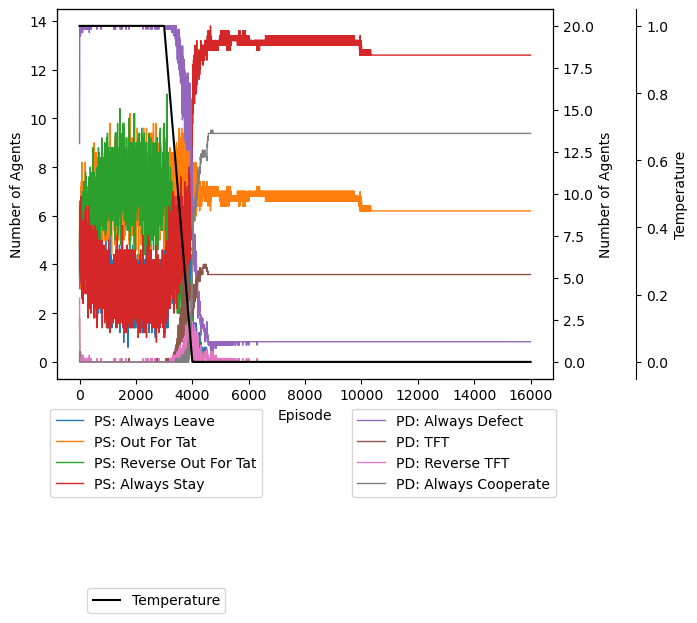

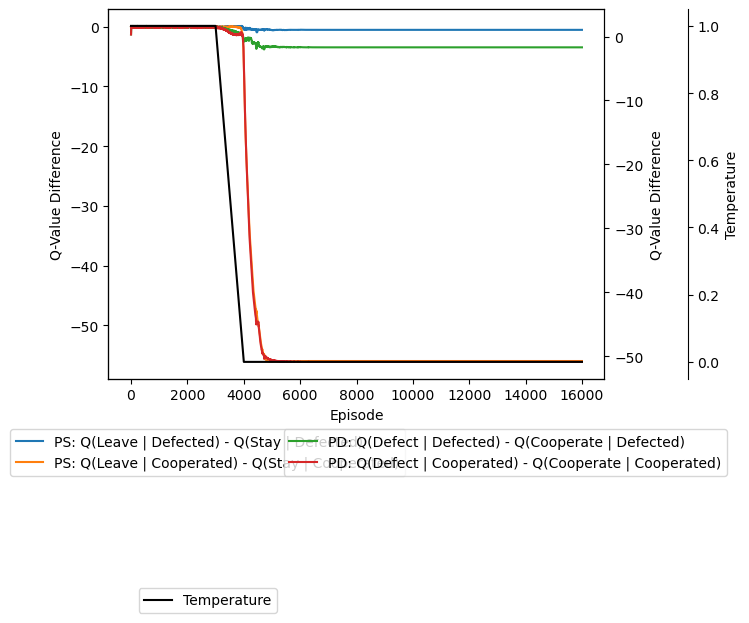

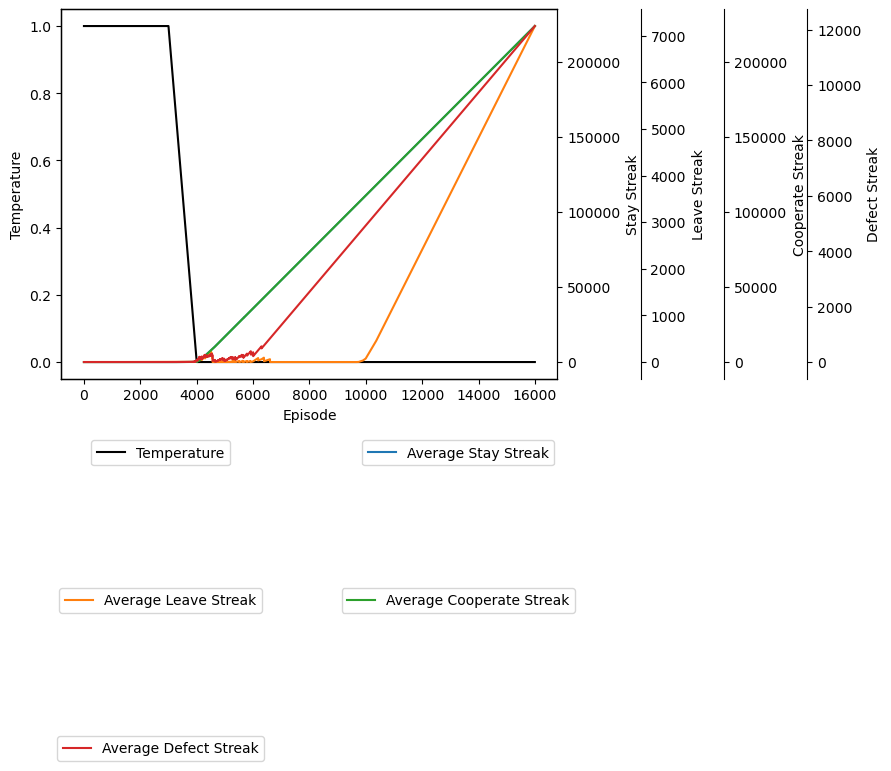

######################################################################################################################################################
######################################################################################################################################################
population: 20
rounds: 20
learning_rate: 0.05
learning_mode: q_learning
policy_mode: epsilon_greedy
starting_temperature: 1
discount_rate: 0.99
delta_t: 0.0001
decay_type: linear
start_decay_episode: 3000
end_decay_episode: None
disposition: 0.0
know_fresh_agent: 1.0
prefer_same_pool: 0.0
prefer_different_pool: 0.0
######################################################################################################################################################
######################################################################################################################################################

Discount_Rate: 0.000100


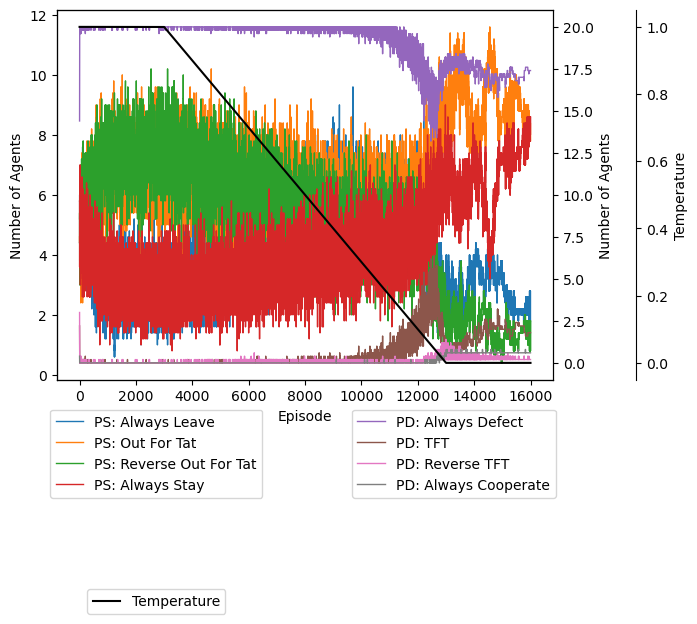

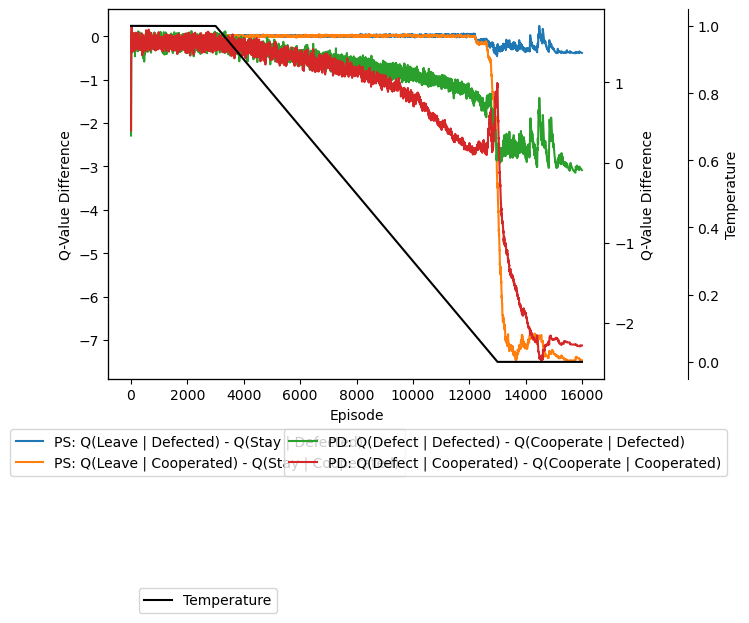

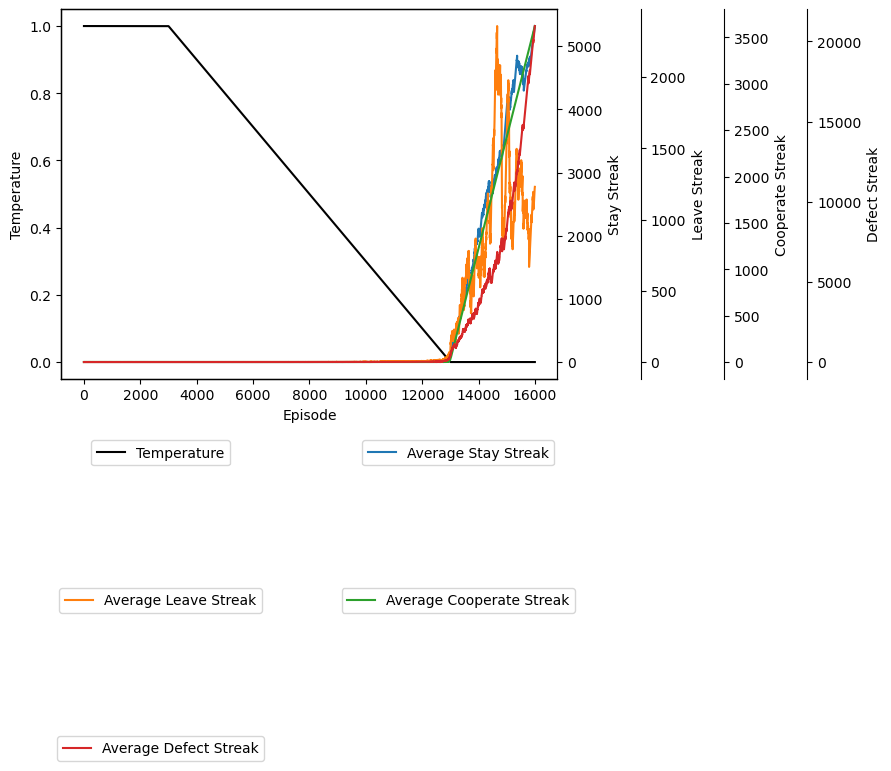

In [2]:
import os
import pickle

# get all filepaths in the "plot" directory
sims = [f"plot/{f}" for f in os.listdir("plot") if f.endswith(".pkl")]

for sim in sims:
    with open(sim, "rb") as f:
        results = pickle.load(f)

    temp_results = results
    for _ in range(1):
        print("$"*150)
    print(sim)
    for _ in range(1):
        print("$"*150)
    print()
    for temp, p_r in temp_results.items():
        for _ in range(2):
            print("#"*150)
        for key, value in p_r["params"].items():
            print(f"{key}: {value}")
        for _ in range(2):
            print("#"*150)
        print()
        print("Discount_Rate: %f" % temp)
        # print(f"Requires ~{.01/(1.0 - temp):.2f} episodes per 1 at 0.99")
        params = p_r["params"]
        results = p_r["output"]
        plot([Plots.STRATEGIES_PS, Plots.STRATEGIES_PD, Plots.TEMPERATURES], results)
        plot([Plots.Q_VALUES_DIFFS_PS, Plots.Q_VALUES_DIFFS_PD, Plots.TEMPERATURES], results)
        plot([Plots.TEMPERATURES, Plots.STAY_STREAK_AVGS, Plots.LEAVE_STREAK_AVGS, Plots.COOPERATE_STREAK_AVGS, Plots.DEFECT_STREAK_AVGS], results)
